In [3]:
#####################
# Library Loading
#####################
library(tidyverse)
library(cowplot)
library(GGally)
library(ggrepel)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.1     ✔ dplyr   0.8.4
✔ tidyr   0.8.1     ✔ stringr 1.4.0
✔ readr   1.1.1     ✔ forcats 0.3.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘GGally’


The following object is masked from ‘package:dplyr’:

    nasa




In [4]:
#####################
# Config Theme
#####################
theme_set(theme_light())
options(repr.plot.width=10, repr.plot.height=10)

In [5]:
#####################
# Color Pallett
#####################
GroupID_Color_List = c("Naive"="#88008A", "CCR6neg"="#FFA500", "CCR6low"="#0456f8", "CCR6int"="#1D8F06", "CCR6high"="#e51134")
GroupID_Order_List = c("Naive", "CCR6neg", "CCR6low", "CCR6int", "CCR6high")
GroupID_Label_superscript_List = c("Naive",  as.character(expression(paste("CCR6"^neg))),  as.character(expression(paste("CCR6"^low))),  as.character(expression(paste("CCR6"^int))),  as.character(expression(paste("CCR6"^high))))
GroupID_Label_List = c("Naive"="Naive", "CCR6neg"=expression(paste("CCR6"^neg)), "CCR6low"=expression(paste("CCR6"^low)), "CCR6int"=expression(paste("CCR6"^int)), "CCR6high"=expression(paste("CCR6"^high)))

In [6]:
#####################
# Input/Output
#####################
expression_file_Path = "../Data/Fluidigm_Donor123_Log2_Expression.txt"
average_expression_file_Path = "../Data/Fluidigm_Donor123_average_log2_expression.txt"
gene_list_file_Path = "../Data/Fluidigm_Donor123_Gene_List_Oct_31.txt"
metadata_file_Path = "../Data/Fluidigm_Donor123_sample_design.txt"

In [7]:
#####################
# Read I/O
#####################
expression_DF = read_tsv(expression_file_Path, col_names = TRUE)
#head(expression_DF, n=5L)
#dim(expression_DF)
average_expression_DF = read_tsv(average_expression_file_Path, col_names = TRUE)
#head(average_expression_DF, n=5L)
#dim(expression_DF)
gene_list_DF = read_tsv(gene_list_file_Path)
#head(gene_list_DF, n=5L)
#dim(gene_list_DF)
metadata_DF = read_tsv(metadata_file_Path)
#head(metadata_DF, n=5L)
#dim(metadata_DF)

Parsed with column specification:
cols(
  .default = col_double(),
  ID = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  ID = col_character(),
  Naive = col_double(),
  CCR6neg = col_double(),
  CCR6low = col_double(),
  CCR6int = col_double(),
  CCR6high = col_double()
)

Parsed with column specification:
cols(
  GeneID = col_character()
)

Parsed with column specification:
cols(
  SampleID = col_character(),
  GroupID = col_character()
)



In [8]:
####################
#Data Wrangling
####################
#1-innerjoin with gene list
filtered_expression_DF = gene_list_DF %>% inner_join(expression_DF, by = c("GeneID" = "ID"))
#head(filtered_expression_DF)
#dim(filtered_expression_DF)

#2- transposed
transposed_filtered_expression_DF = filtered_expression_DF %>%  gather(SampleID, Expression, -GeneID) %>% spread(GeneID, Expression)
#head(transposed_filtered_expression_DF)
#dim(transposed_filtered_expression_DF)

#3- innerjoin with metadata
metadata_transposed_filtered_expression_DF = metadata_DF %>% inner_join(transposed_filtered_expression_DF, by = c("SampleID" = "SampleID"))
#head(metadata_transposed_filtered_expression_DF)

#4- calculate average expression
average_metadata_transposed_filtered_expression_DF = metadata_transposed_filtered_expression_DF %>% 
    select(-c("SampleID")) %>% 
    group_by(GroupID) %>% 
    summarise_all(list(mean), na.rm=TRUE)
head(average_metadata_transposed_filtered_expression_DF)

#5-Transpose
transposed_average_metadata_transposed_filtered_expression_DF = average_metadata_transposed_filtered_expression_DF %>% gather(var, value, -GroupID) %>% spread(GroupID, value)
head(transposed_average_metadata_transposed_filtered_expression_DF)

GroupID,BATF,CCL20,CCR6,CXCR3,CXCR5,EOMES,GATA3,GFI1,IFNG,⋯,IL23R,IL4,IL7R,IRF4,KLRB1,RORA,RORC,SPI1,TBX21,TNF
CCR6high,8.375521,9.3925979,6.398627,1.375987,2.723686,0.4437867,1.847527,2.183662,2.034696,⋯,3.30829746,0.4260866,10.081916,9.487767,7.577572,8.167379,4.8922525,2.663567,3.333955,8.714514
CCR6int,7.336066,6.3726373,4.055637,3.404513,4.821124,3.4235877,2.751232,3.414635,5.520723,⋯,1.58445889,1.1819798,11.843116,9.321908,7.245153,6.727123,3.2737517,4.364076,4.455263,8.736081
CCR6low,7.867840,3.9056993,3.631654,3.457419,5.251739,5.5195818,3.574237,4.090094,9.088760,⋯,0.64175724,1.5150817,10.570353,9.663248,7.269166,6.302617,2.0308098,6.759776,5.002158,8.031329
CCR6neg,8.175214,0.8658731,2.081501,4.017924,5.248458,1.7893153,1.496653,4.512375,11.174032,⋯,0.02891028,1.6403346,11.696742,10.009829,3.730294,3.588968,0.2574974,4.849186,5.048762,7.814181
Naive,7.569792,0.6302696,2.504018,2.110067,2.347070,2.5537105,2.227102,3.918480,1.319624,⋯,0.08898619,0.1563370,9.562028,10.080623,2.961566,2.150332,0.2639492,5.016316,2.723426,2.462300


var,CCR6high,CCR6int,CCR6low,CCR6neg,Naive
BATF,8.3755215,7.336066,7.867840,8.1752137,7.5697920
CCL20,9.3925979,6.372637,3.905699,0.8658731,0.6302696
CCR6,6.3986269,4.055637,3.631654,2.0815008,2.5040179
CXCR3,1.3759866,3.404513,3.457419,4.0179243,2.1100674
CXCR5,2.7236862,4.821124,5.251739,5.2484582,2.3470699
EOMES,0.4437867,3.423588,5.519582,1.7893153,2.5537105


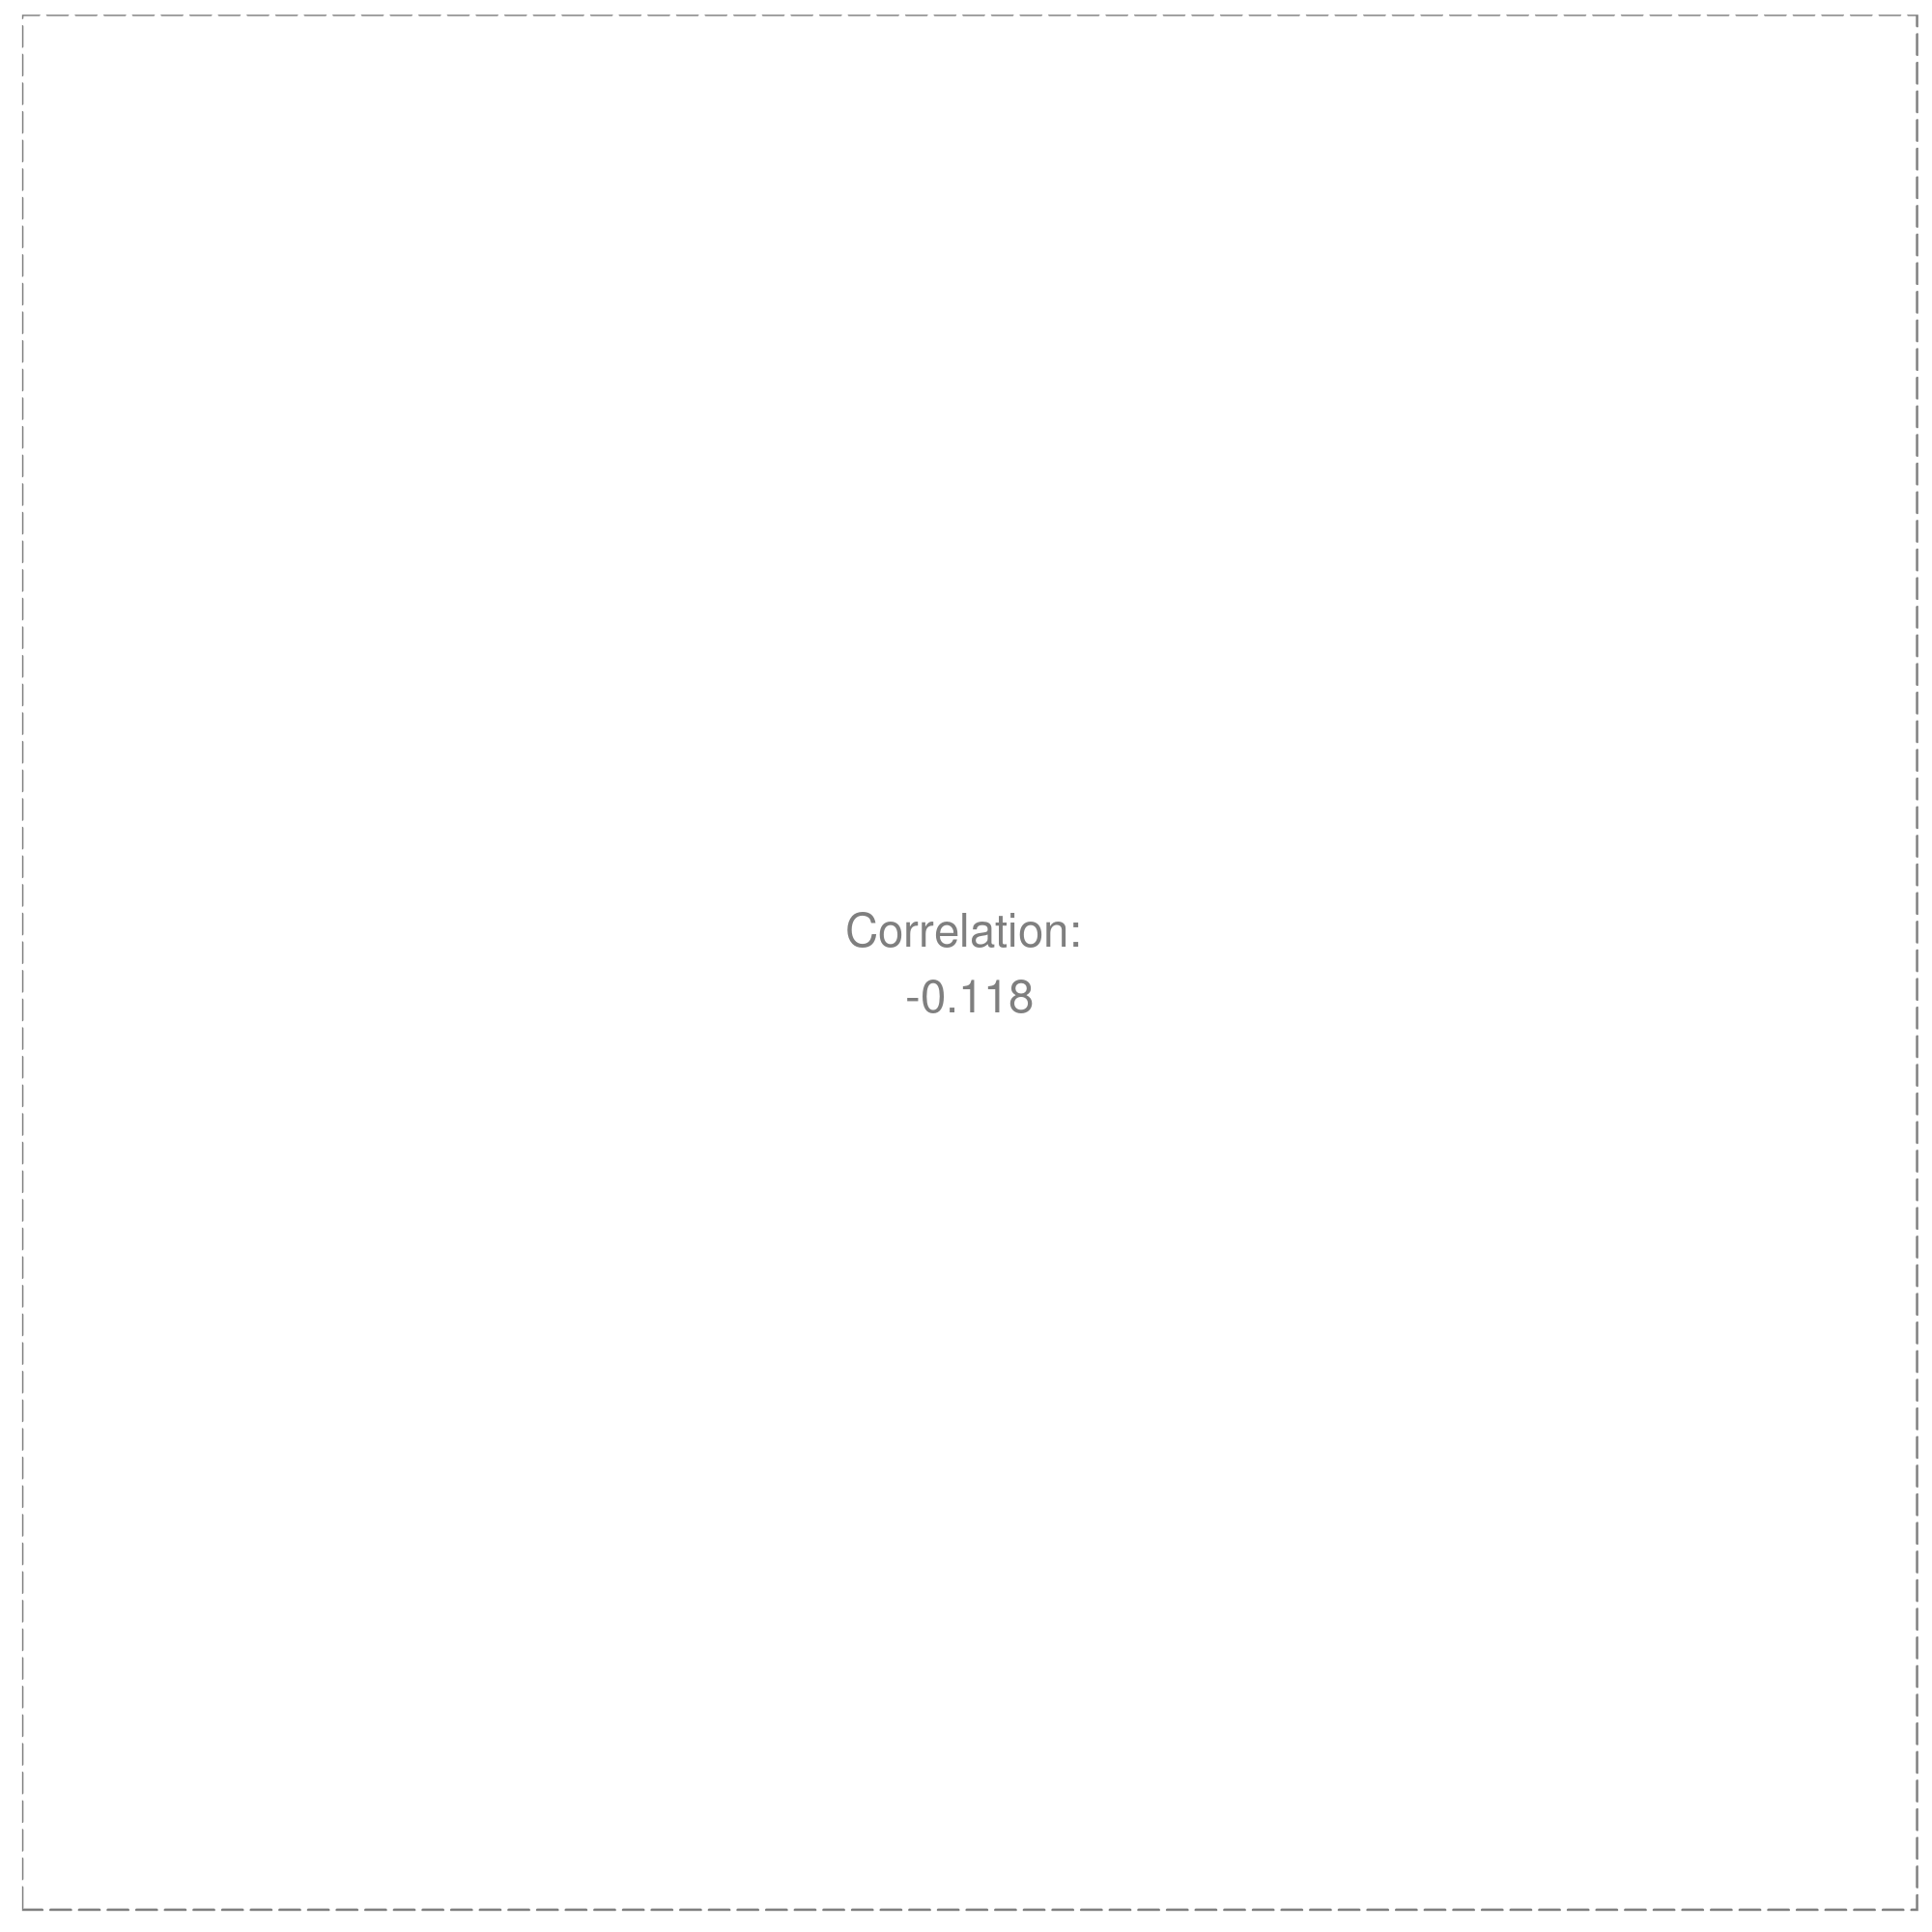

In [64]:
my_custom_cor <- function(data, mapping, color = I("grey50"), sizeRange = c(8,8), ...) {

  #get the x and y data to use the other code
  x <- GGally::eval_data_col(data, mapping$x)
  y <- GGally::eval_data_col(data, mapping$y)

  ct <- cor.test(x,y)
  sig <- symnum(
    ct$p.value, corr = FALSE, na = FALSE,
    cutpoints = c(0, 0.001, 0.01, 0.05, 0.1, 1),
    symbols = c("***", "**", "*", ".", " ")
  )

  r <- unname(ct$estimate)
  rt <- format(r, digits=2)[1]

  # since we can't print it to get the strsize, just use the max size range
  cex <- max(sizeRange)

  # helper function to calculate a useable size
  percent_of_range <- function(percent, range) {
    percent * diff(range) + min(range, na.rm = TRUE)
  }

  # plot the cor value
  ggally_text(
    label = paste("Correlation: ", as.character(rt),sep="\n"), 
    mapping = aes(),
    xP = 0.5, yP = 0.5, 
    size = I(percent_of_range(cex * abs(r), sizeRange)),
    color = color,
    ...
  )  + 
    # remove all the background stuff and wrap it with a dashed line
    theme_classic() + 
    theme(
      panel.background = element_rect(
        color = color, 
        linetype = "longdash"
      ), 
      axis.line = element_blank(), 
      axis.ticks = element_blank(), 
      axis.text.y = element_blank(), 
      axis.text.x = element_blank()
    )
}
my_custom_cor(iris, aes(Sepal.Length, Sepal.Width))

In [76]:
####################
# PairsPlot
####################

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
lower_function <- function(data, mapping, ...){
  p <- ggplot(data = data, mapping = mapping) + 
    geom_point(color="black", size=1) +
    #geom_text_repel(label = transposed_average_metadata_transposed_filtered_expression_DF$var, size=2)
    geom_text_repel(data = transposed_average_metadata_transposed_filtered_expression_DF, 
                    aes(label=var), 
                    size=2, 
                    box.padding = unit(0.35, "lines"),
                    point.padding = unit(0.3, "lines"),alpha = 0.85, na.rm = TRUE
    
    )
    
    #geom_smooth(method=loess, fill="red", color="red", ...) +
    #geom_smooth(method=lm, fill="#1f77b4", color="#1f77b4", ...)
  p
}
######################
pairs_plot_Object = ggpairs(data=transposed_average_metadata_transposed_filtered_expression_DF, 
                columns = GroupID_Order_List, 
                columnLabels= GroupID_Label_superscript_List,
                            
                #labeller = labeller(columnLabels = superscript_groupID_List),
                #labeller = label_value, 
                labeller = "label_parsed",   
                diag = list(continuous = wrap("barDiag", colour = "black", fill="steelblue", binwidth=2, size=0.1)),  
                upper = list(continuous = my_custom_cor),
                #upper = list(continuous = "density", combo = "box_no_facet"),
                #upper = list(continuous = lower_function),           
                lower = list(continuous = lower_function),
            ) + 
            labs(title = NULL, subtitle = NULL, caption = NULL, tag = NULL, x=NULL, y=NULL) +
            theme(
                text=element_text(size=10, colour = "black",family="sans", face="plain",),
                #Axis
                axis.title = element_text(size=10, colour = "black",family="sans", face="plain",),
                axis.line = element_line(colour = "black"),
                axis.title.x = element_text(size=14,  family="sans", face="plain", color = "black", hjust = 0.5),
                axis.title.y = element_text(size=14,  family="sans", face="plain", color = "black", hjust = 0.5, vjust=0),
                axis.text.x = element_text(size=8,  family="sans", face="plain", color = "black", angle=0, vjust=0.5),
                axis.text.y = element_text(size=8,  family="sans", face="plain", color = "black", angle=0, vjust=0.5),
                #Strip
                strip.placement = "outside",
                strip.text = element_text(size=16,  family="sans", face="plain", color = "black"),
                strip.background = element_rect(color = "black", size = 0.25, fill = "grey95"),
                strip.text.x = element_text(size = 16, colour = "black", angle = 0, family="sans", face="plain"),
                strip.text.y = element_text(size = 16, colour = "black", angle = -90,family="sans", face="plain"),
                
                #Panel
                panel.grid.major = element_line(color = "grey95", size = 0.25), 
                panel.grid.minor = element_line(color = "grey95", size = 0.25),
                panel.background = element_rect(color = "black", size = 0.25, fill = "grey99"),
                panel.border = element_rect(color = "black", size = 0.25, fill = NA),


                )


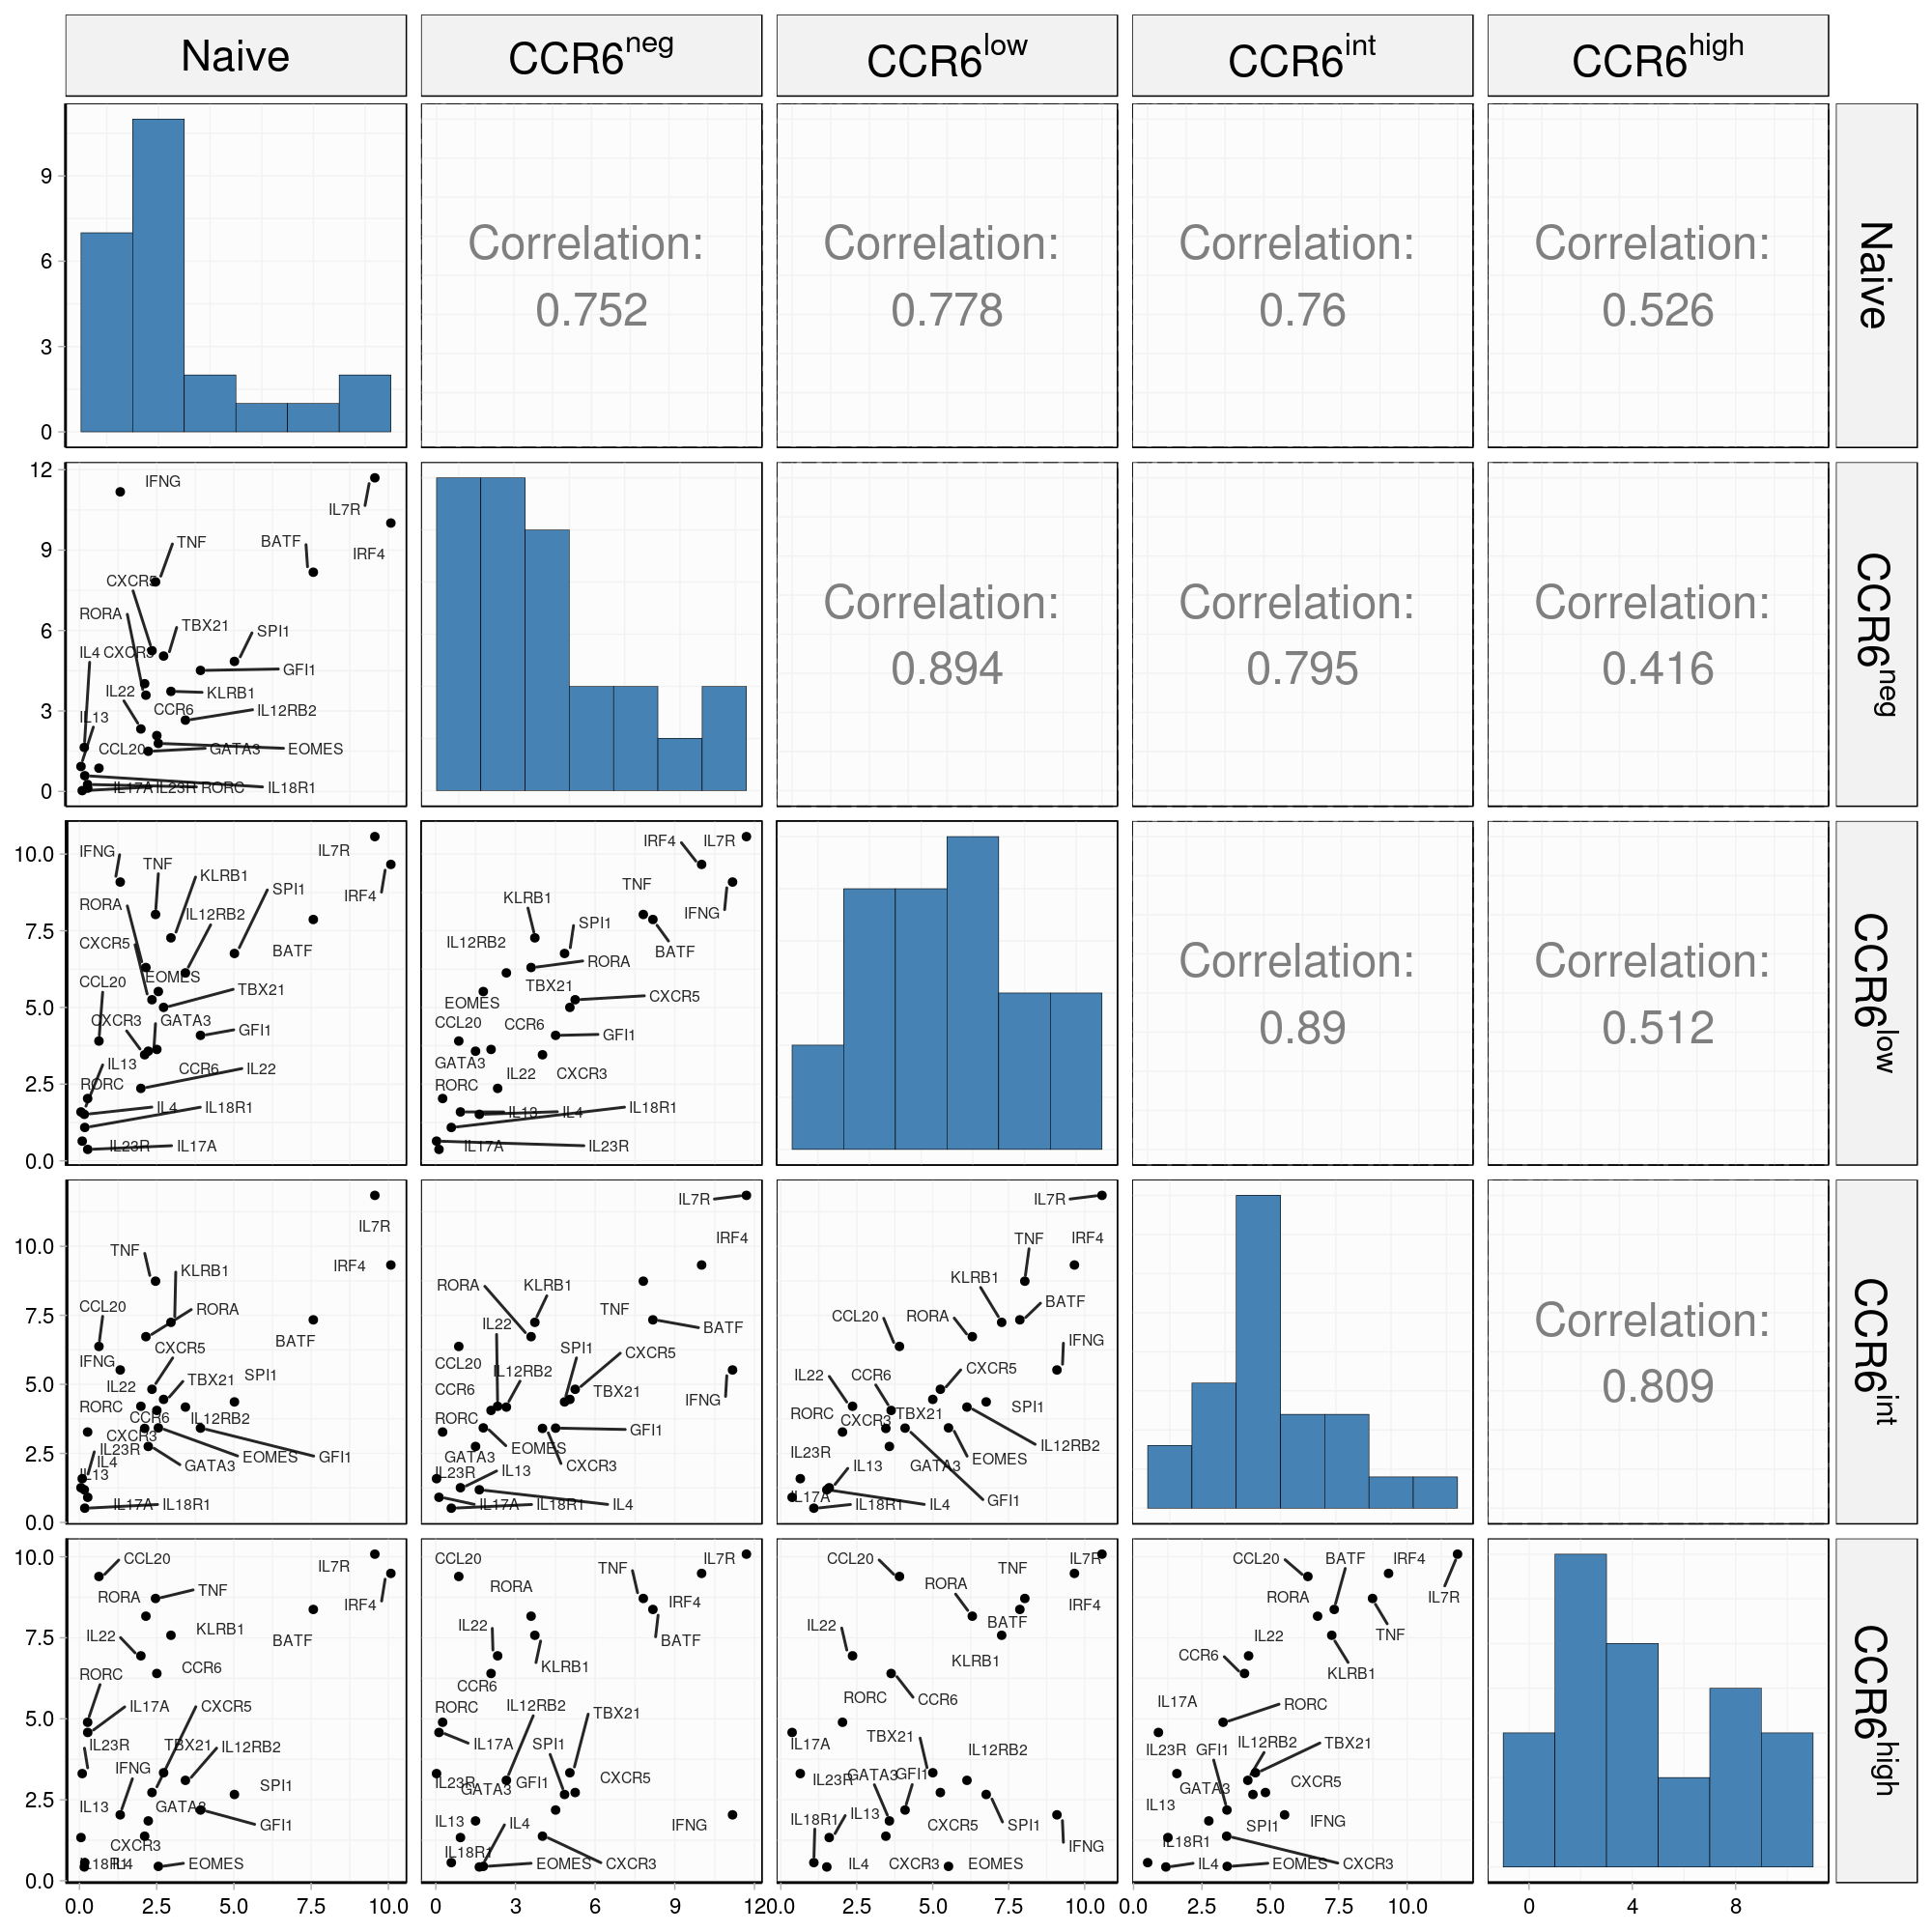

In [77]:
options(repr.plot.width=10, repr.plot.height=10, repr.plot.res=200)
pairs_plot_Object

In [78]:
##################
# SAVE PDF
##################
ggsave(file="../Result/Fluidigm_scRNA_SubsetCorrelation_PairsPlot.png", device="png", plot=pairs_plot_Object, width = 10, height =10, units = "in", dpi=600)